<a href="https://colab.research.google.com/github/ARUNE-BIT/stock-market-forecast/blob/main/STOCK_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import datetime as dt  


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nifty/Nifty50_Index_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52


In [ ]:
df["sma10"] =  df.Close.rolling(window=10,min_periods = 1).mean().round(2)
df["sma20"] =  df.Close.rolling(window=20,min_periods = 1).mean().round(2)
df["sma50"] =  df.Close.rolling(window=50,min_periods = 1).mean().round(2)
# exp moving average calc : 10 day,20,day , 50 day 
df['ema10'] = df.Close.ewm(span=10,adjust=False,min_periods=1).mean().round(2)
df['ema20'] = df.Close.ewm(span=20,adjust=False,min_periods=1).mean().round(2)
df['ema50'] = df.Close.ewm(span=50,adjust=False,min_periods=1).mean().round(2)

In [ ]:
df['sma10sig'],df['sma20sig'],df['sma50sig'] = df.sma10,df.sma20,df.sma50

for i in range(len(df.Close)):
    if df.sma10[i] < df.Close[i]:
        df.sma10sig.loc[i] = 1
    else:
        df.sma10sig.loc[i] = 0
   
    if df.sma20[i] < df.Close[i]:
        df.sma20sig.loc[i] = 1
    else:
        df.sma20sig.loc[i] = 0
        
    if df.sma50[i] < df.Close[i]:
        df.sma50sig.loc[i] = 1
    else:
        df.sma50sig.loc[i] = 0
        
 
print(df.sma10sig.sum(),df.sma20sig.sum(),df.sma50sig.sum())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


2086.0 2136.0 2245.0


In [ ]:
df['ema10sig'],df['ema20sig'],df['ema50sig'] = df.ema10,df.ema20,df.ema50

for i in range(len(df.Close)):
    if df.ema10[i] < df.Close[i]:
        df.ema10sig.loc[i] = 1
    else:
        df.ema10sig.loc[i] = 0
   
    if df.ema20[i] < df.Close[i]:
        df.ema20sig.loc[i] = 1
    else:
        df.ema20sig.loc[i] = 0
        
    if df.ema50[i] < df.Close[i]:
        df.ema50sig.loc[i] = 1
    else:
        df.ema50sig.loc[i] = 0

print(df.ema10sig.sum(),df.ema20sig.sum(),df.ema50sig.sum())

2101.0 2152.0 2296.0


In [ ]:
df['Volatility'] = round(df.Close.pct_change(periods=1,fill_method='pad') * 100 , 2)
df['Momentum'] = df.Volatility.apply(lambda x : 0 if (x<0) else 1)
df['OI_change'] = df.Volume.diff(periods =1)
df['OI_Volatility'] = round(df.Volume.pct_change(periods=1,fill_method='pad') * 100,2)
df['OI_Momentum'] = df.OI_Volatility.apply(lambda x : 0 if (x<0) else 1)

In [ ]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10           3508 non-null   float64
 10  sma20           3508 non-null   float64
 11  sma50           3508 non-null   float64
 12  ema10           3508 non-null   float64
 13  ema20           3508 non-null   float64
 14  ema50           3508 non-null   float64
 15  sma10sig        3508 non-null   float64
 16  sma20sig        3508 non-null   float64
 17  sma50sig        3508 non-null   f

In [ ]:
df.drop(['sma10','sma20','sma50','ema10','ema20','ema50'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10sig        3508 non-null   float64
 10  sma20sig        3508 non-null   float64
 11  sma50sig        3508 non-null   float64
 12  ema10sig        3508 non-null   float64
 13  ema20sig        3508 non-null   float64
 14  ema50sig        3508 non-null   float64
 15  Volatility      3508 non-null   float64
 16  Momentum        3508 non-null   int64  
 17  OI_change       3508 non-null   f

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [ ]:
training_set = df.loc[0:3000,:]
test_set = df.loc[3000:,:]
print('Training Set Shape:' + str(training_set.shape) ,'Test Set Shape:' + str(test_set.shape))

Training Set Shape:(3000, 20) Test Set Shape:(509, 20)


In [ ]:
training_set.set_index('Date',inplace=True)
test_set.set_index('Date',inplace=True)
 
train_data = training_set.to_numpy()
test_data = test_set.to_numpy()
print('Training Set Shape:' + str(train_data.shape) ,'Test Set Shape:' + str(test_data.shape))

Training Set Shape:(3000, 19) Test Set Shape:(509, 19)


In [ ]:
from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler(feature_range=(0,1))


scaler1=MinMaxScaler(feature_range=(0,1))
scaler2=MinMaxScaler(feature_range=(0,1))
X_train  = scaler1.fit_transform(train_data)
X_test   = scaler2.fit_transform(test_data)
print('Training Set Shape:' + str(X_train.shape) ,'Test Set Shape:' + str(X_test.shape))


y_train = X_train[:,3]
y_test = X_test[:,3]
print('y_train Set Shape:' + str(y_train.shape) ,'y_Test Set Shape:' + str(y_test.shape))

Training Set Shape:(3000, 19) Test Set Shape:(509, 19)
y_train Set Shape:(3000,) y_Test Set Shape:(509,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print('X_train Set Shape:' + str(X_train.shape) ,'X_Test Set Shape:' + str(X_test.shape))

X_train Set Shape:(3000, 1, 19) X_Test Set Shape:(509, 1, 19)


In [ ]:
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
import keras 
import tensorflow as tf 

In [ ]:
from sklearn.metrics import mean_absolute_error , r2_score
scale = MinMaxScaler()  
scale.min_,scale.scale_ = scaler2.min_[0],scaler2.scale_[0] 
epoch = 200
validation_set = 0.2
batch_size = 10 
training_loss = np.zeros(epoch)
training_mae_loss = np.zeros(epoch)
validation_Loss = np.zeros(epoch)
validation_mae_loss =np.zeros(epoch)
training_rmse_loss = np.zeros(epoch)
training_msle_loss = np.zeros(epoch)
predicted_average_price = np.zeros(len(y_test))
model = Sequential()
neurons = 128 
dense_l1 = 64
output_size = 1
activ_func ='relu'
activ_out_func ='linear'
loss = keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
dropout = 0.2
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)  
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,recurrent_activation=activ_func,dropout=dropout,input_shape=(X_train.shape[1],X_train.shape[2])))  # size is 2000 x 1 x 5
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
model.add(LSTM(units=neurons,activation=activ_func,dropout=dropout)) 
model.add(Dense(units=dense_l1,activation=activ_func))
model.add(Dense(units=output_size,activation=activ_out_func)) 
model.compile(loss=loss, optimizer=opt_adam,metrics=[keras.metrics.RootMeanSquaredError()])
model_history = model.fit(X_train,y_train,epochs=epoch,validation_split= validation_set , batch_size=batch_size, verbose=2, shuffle=False)
closing_price=model.predict(X_test)  
closing_price_scaled=scale.inverse_transform(closing_price)
X2 = pd.DataFrame.copy(test_set)
X2['Predictions']=closing_price_scaled
training_loss = training_loss + model_history.history['loss']
validation_Loss = validation_Loss + model_history.history['val_loss']
training_rmse_loss= training_rmse_loss + model_history.history['root_mean_squared_error']
predicted_average_price = predicted_average_price +  closing_price_scaled.reshape(len(y_test)) 
print("LSTM Model execution finished")

Epoch 1/200
240/240 - 11s - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1178 - 11s/epoch - 47ms/step
Epoch 2/200
240/240 - 3s - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0698 - val_root_mean_squared_error: 0.2643 - 3s/epoch - 14ms/step
Epoch 3/200
240/240 - 3s - loss: 0.0334 - root_mean_squared_error: 0.1827 - val_loss: 0.0766 - val_root_mean_squared_error: 0.2767 - 3s/epoch - 13ms/step
Epoch 4/200
240/240 - 3s - loss: 0.0325 - root_mean_squared_error: 0.1803 - val_loss: 0.0775 - val_root_mean_squared_error: 0.2785 - 3s/epoch - 14ms/step
Epoch 5/200
240/240 - 3s - loss: 0.0327 - root_mean_squared_error: 0.1808 - val_loss: 0.0797 - val_root_mean_squared_error: 0.2824 - 3s/epoch - 13ms/step
Epoch 6/200
240/240 - 3s - loss: 0.0324 - root_mean_squared_error: 0.1799 - val_loss: 0.0790 - val_root_mean_squared_error: 0.2811 - 3s/epoch - 13ms/step
Epoch 7/200
240/240 - 3s - loss: 0.0322 - root_mean_squared_error: 0.1796 

In [ ]:
New_Labels=['training_loss','validation_Loss','training_rmse_loss']
df_out =  pd.DataFrame([training_loss,validation_Loss,training_rmse_loss],index=None)
df_out = df_out.transpose()
df_out.columns = New_Labels
df_out.head()

,training_loss,validation_Loss,training_rmse_loss
0,0.024144,0.013866,0.155384
1,0.043598,0.069841,0.208801
2,0.033383,0.076558,0.182711
3,0.032501,0.077548,0.180280
4,0.032684,0.079731,0.180786


In [ ]:
df_pred = pd.DataFrame()
New_Labels=['Date','Original_Close','Predicted_close']
df_pred = pd.DataFrame.copy(test_set)
df_pred['Predicted_Close_price'] = predicted_average_price.round(2)
df_pred = df_pred.filter(items=['Close', 'Predicted_Close_price'])
df_pred.head()

,Close,Predicted_Close_price
Date,,
2018-02-06,10498.25,10405.21
2018-02-07,10476.70,10539.34
2018-02-08,10576.85,10554.82
2018-02-09,10454.95,10428.04
2018-02-12,10539.75,10522.45


In [ ]:
plt.rc('font', size=10)         
plt.rc('axes', titlesize=14)     
plt.rc('axes', labelsize=12)  
plt.rc('xtick', labelsize=10)    
plt.rc('ytick', labelsize=10)    
plt.rc('legend', fontsize=12)   
plt.rc('figure', titlesize=14)

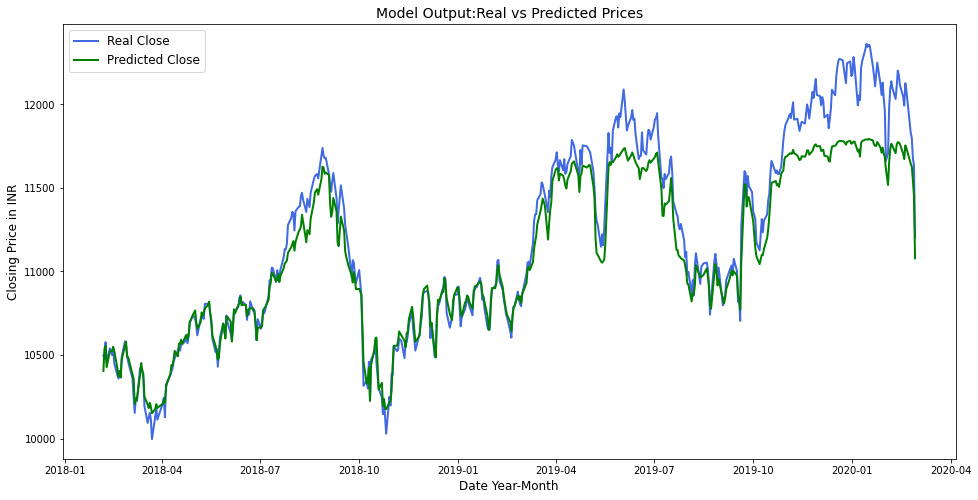

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_pred.index,df_pred.Close, label='Real Close',color='royalblue',linewidth=2)
plt.plot(df_pred.index,df_pred.Predicted_Close_price, label='Predicted Close',color='green',linewidth=2)
plt.ylabel("Closing Price in INR")
plt.xlabel("Date Year-Month")
plt.title("Model Output:Real vs Predicted Prices")
plt.legend()
plt.show()

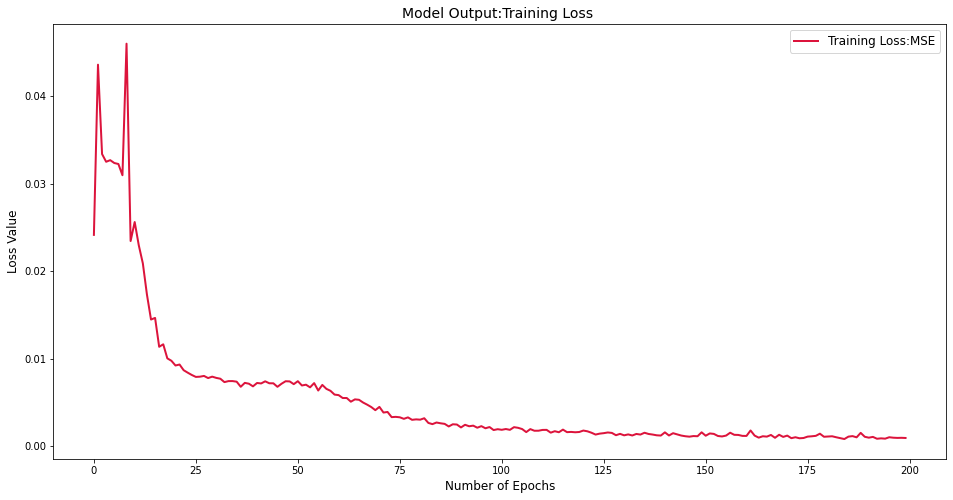

In [ ]:
df_out['epochs'] = np.arange(epoch)

plt.figure(figsize=(16,8))
plt.plot(df_out.epochs,df_out.training_loss, label='Training Loss:MSE',color='crimson',linewidth=2)
plt.ylabel("Loss Value")
plt.xlabel("Number of Epochs")
plt.title("Model Output:Training Loss ")
plt.legend()
plt.show()

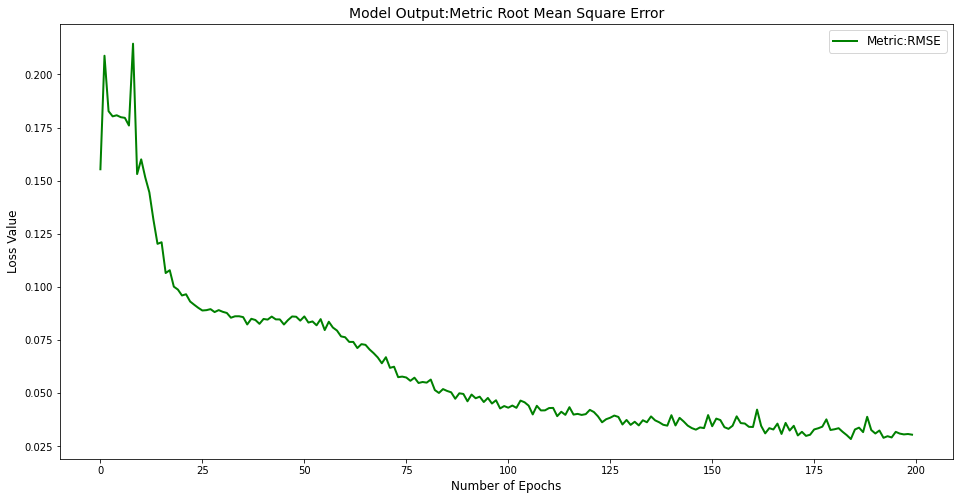

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_out.epochs,df_out.training_rmse_loss, label='Metric:RMSE',color='green',linewidth=2)
plt.ylabel("Loss Value")
plt.xlabel("Number of Epochs")
plt.title("Model Output:Metric Root Mean Square Error")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
pred= r2_score(df_pred.Close,df_pred.Predicted_Close_price)*100 
print("R2 Score for Model : " , pred.round(4))

R2 Score for Model :  91.7604
